In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import datasets
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [78]:
housing_X = pd.read_csv("housing.csv")
housing_Y = housing_X['MEDV']
del housing_X['MEDV']

# 转换为 TensorFlow Dataset
dataset = tf.data.Dataset.from_tensor_slices((housing_X.values, housing_Y.values))

# 将数据集划分为训练集和测试集
train_size = int(0.8 * len(dataset))
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

# 随机打乱训练集
train_dataset = train_dataset.shuffle(buffer_size=train_size, seed=42)

X_train_np = np.array(list(train_dataset.map(lambda x, y: x)))
Y_train_np = np.array(list(train_dataset.map(lambda x, y: y)))
X_test_np = np.array(list(test_dataset.map(lambda x, y: x)))
Y_test_np = np.array(list(test_dataset.map(lambda x, y: y)))

Epoch 1/500
11/11 [==============================] - 0s 5ms/step - loss: 13967896652103548928.0000 - val_loss: 88007006631231488.0000
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 23949525768994816.0000 - val_loss: 649376775012352.0000
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 176716211290112.0000 - val_loss: 4791566073856.0000
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 1303938072576.0000 - val_loss: 35355975680.0000
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 9621434368.0000 - val_loss: 260901088.0000
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 70994056.0000 - val_loss: 1920243.7500
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 522094.2188 - val_loss: 14144.5391
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 3874.5066 - val_loss: 171.4713
Epoch 9/500
11/11 [==============================] 

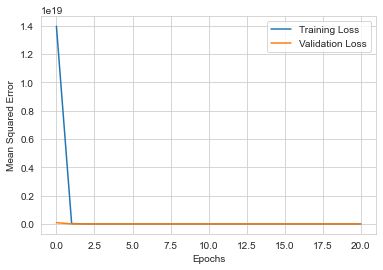

4/4 [==============================] - 0s 333us/step - loss: 87.0644
87.06437683105469
4/4 [==============================] - 0s 667us/step
R-squared: -2.2379941266459134
RMSE: 9.330829742014794


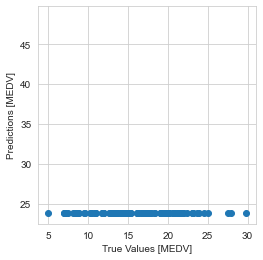

In [88]:
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import EarlyStopping

# 步骤1: 构建一个简单的神经网络模型
model = Sequential([
    Dense(8, activation='relu', input_shape=(13,)),
    Dense(1, activation='linear')  # 输出层，回归任务，一个输出节点
])

# 步骤2: 编译模型，选择损失函数和优化器
model.compile(optimizer=SGD(learning_rate=0.1), loss='mean_squared_error')

# 步骤3: 训练模型
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
h = model.fit(X_train_np, Y_train_np, epochs=500, batch_size=32, validation_split=0.2,callbacks=[early_stopping])

# 步骤4: 绘制训练过程的损失曲线
plt.plot(h.history['loss'], label='Training Loss')
plt.plot(h.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# 步骤5: 在测试集上评估模型
test_loss = model.evaluate(X_test_np, Y_test_np)
print(test_loss)
# 步骤6: 进行预测并可视化
predictions = model.predict(X_test_np)
# R-squared 值
r2 = r2_score(Y_test_np, predictions)
print(f'R-squared: {r2}')

# 均方根误差 (RMSE)
rmse = np.sqrt(mean_squared_error(Y_test_np, predictions))
print(f'RMSE: {rmse}')


plt.scatter(Y_test_np, predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.show()

Epoch 1/500
7/7 [==============================] - 0s 9ms/step - loss: 188.1266 - val_loss: 77.7929
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 90.9533 - val_loss: 80.3603
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 88.2989 - val_loss: 77.2682
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 89.1953 - val_loss: 76.3206
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 88.8867 - val_loss: 83.8661
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 89.9105 - val_loss: 76.5703
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 89.9195 - val_loss: 83.5317
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 90.7288 - val_loss: 76.3666
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 89.3215 - val_loss: 78.9059
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 89.0307 - val_loss: 76.3963
Epoch 11

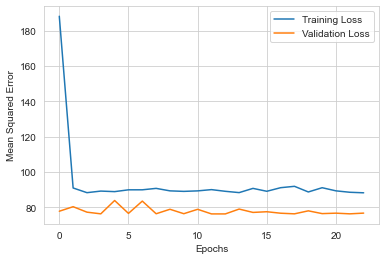

4/4 [==============================] - 0s 667us/step - loss: 87.7753
87.7752914428711
4/4 [==============================] - 0s 667us/step
R-squared: -2.2644333277012736
RMSE: 9.368846817575134


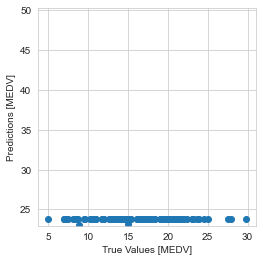

In [80]:
#小批量训练
model2 = Sequential([
    Dense(6, input_dim=13, activation='sigmoid'),
    Dense(1)
])
model2.compile(optimizer=SGD(learning_rate=0.1), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history2 = model2.fit(X_train_np, Y_train_np, epochs=500, batch_size=50, validation_split=0.2, callbacks=[early_stopping])

# 步骤4: 绘制训练过程的损失曲线
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# 步骤5: 在测试集上评估模型
test_loss = model2.evaluate(X_test_np, Y_test_np)
print(test_loss)
# 步骤6: 进行预测并可视化
predictions = model2.predict(X_test_np)
# R-squared 值
r2 = r2_score(Y_test_np, predictions)
print(f'R-squared: {r2}')

# 均方根误差 (RMSE)
rmse = np.sqrt(mean_squared_error(Y_test_np, predictions))
print(f'RMSE: {rmse}')


plt.scatter(Y_test_np, predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.show()

Epoch 1/5000
13/13 [==============================] - 0s 5ms/step - loss: 632.9365 - val_loss: 604.7669
Epoch 2/5000
13/13 [==============================] - 0s 1ms/step - loss: 628.7136 - val_loss: 600.0573
Epoch 3/5000
13/13 [==============================] - 0s 2ms/step - loss: 625.2175 - val_loss: 596.6777
Epoch 4/5000
13/13 [==============================] - 0s 1ms/step - loss: 621.8849 - val_loss: 593.5198
Epoch 5/5000
13/13 [==============================] - 0s 1ms/step - loss: 619.1671 - val_loss: 590.6263
Epoch 6/5000
13/13 [==============================] - 0s 1ms/step - loss: 616.6340 - val_loss: 587.9507
Epoch 7/5000
13/13 [==============================] - 0s 2ms/step - loss: 614.1091 - val_loss: 585.5739
Epoch 8/5000
13/13 [==============================] - 0s 1ms/step - loss: 611.5806 - val_loss: 583.2643
Epoch 9/5000
13/13 [==============================] - 0s 1ms/step - loss: 609.1573 - val_loss: 580.9858
Epoch 10/5000
13/13 [==============================] - 0s 1ms/st

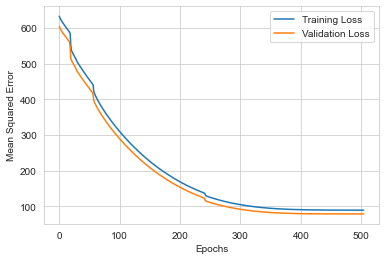

4/4 [==============================] - 0s 333us/step - loss: 49.8433
49.8432502746582
4/4 [==============================] - 0s 667us/step
R-squared: -0.8535981149269478
RMSE: 7.059761446520587


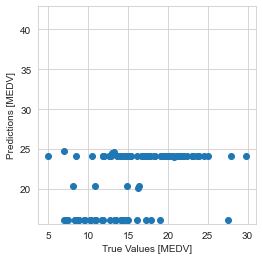

In [81]:
#L2 正则化
model3 = Sequential([
    Dense(6, input_dim=13, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dense(1)
])
model3.compile(loss='mean_squared_error', optimizer='adam')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history3 = model3.fit(X_train_np, Y_train_np, epochs=5000, batch_size=25, validation_split=0.2, callbacks=[early_stopping])

# 步骤4: 绘制训练过程的损失曲线
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# 步骤5: 在测试集上评估模型
test_loss = model3.evaluate(X_test_np, Y_test_np)
print(test_loss)
# 步骤6: 进行预测并可视化
predictions = model3.predict(X_test_np)
# R-squared 值
r2 = r2_score(Y_test_np, predictions)
print(f'R-squared: {r2}')

# 均方根误差 (RMSE)
rmse = np.sqrt(mean_squared_error(Y_test_np, predictions))
print(f'RMSE: {rmse}')


plt.scatter(Y_test_np, predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.show()


Epoch 1/500
7/7 [==============================] - 0s 9ms/step - loss: 229.0758 - val_loss: 76.8159
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 115.7875 - val_loss: 78.1047
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 99.0805 - val_loss: 76.4974
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 108.1997 - val_loss: 76.3050
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 96.5735 - val_loss: 76.5492
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 99.9154 - val_loss: 77.7063
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 94.5362 - val_loss: 76.3821
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 97.9600 - val_loss: 76.5675
Epoch 9/500
7/7 [==============================] - 0s 3ms/step - loss: 92.1173 - val_loss: 76.2845
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 92.8881 - val_loss: 77.9139
Epoch 

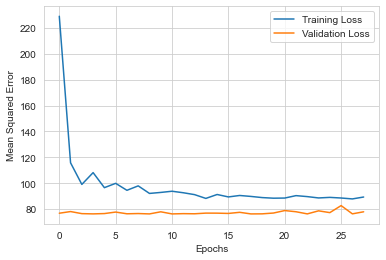

4/4 [==============================] - 0s 667us/step - loss: 88.6807
88.6806640625
4/4 [==============================] - 0s 333us/step
R-squared: -2.298104626194309
RMSE: 9.41704077822004


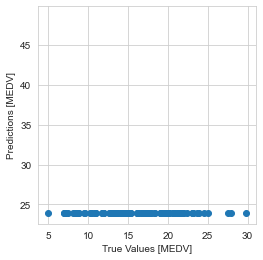

In [82]:
#小批量训练
model4 = Sequential([
    Dense(6, input_dim=13, activation='sigmoid'),
    Dropout(0.2),
    Dense(1)
])
model4.compile(optimizer=SGD(learning_rate=0.1), loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history4 = model4.fit(X_train_np, Y_train_np, epochs=500, batch_size=50, validation_split=0.2, callbacks=[early_stopping])

# 步骤4: 绘制训练过程的损失曲线
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# 步骤5: 在测试集上评估模型
test_loss = model4.evaluate(X_test_np, Y_test_np)
print(test_loss)
# 步骤6: 进行预测并可视化
predictions = model4.predict(X_test_np)
# R-squared 值
r2 = r2_score(Y_test_np, predictions)
print(f'R-squared: {r2}')

# 均方根误差 (RMSE)
rmse = np.sqrt(mean_squared_error(Y_test_np, predictions))
print(f'RMSE: {rmse}')


plt.scatter(Y_test_np, predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.show()


Epoch 1/500
11/11 [==============================] - 0s 6ms/step - loss: 9673.3750 - val_loss: 435.2242
Epoch 2/500
11/11 [==============================] - 0s 2ms/step - loss: 1552.4419 - val_loss: 1678.7300
Epoch 3/500
11/11 [==============================] - 0s 2ms/step - loss: 1684.4485 - val_loss: 1825.8315
Epoch 4/500
11/11 [==============================] - 0s 2ms/step - loss: 1157.3175 - val_loss: 343.9158
Epoch 5/500
11/11 [==============================] - 0s 2ms/step - loss: 853.5886 - val_loss: 142.5976
Epoch 6/500
11/11 [==============================] - 0s 2ms/step - loss: 899.1589 - val_loss: 289.2796
Epoch 7/500
11/11 [==============================] - 0s 2ms/step - loss: 791.6348 - val_loss: 427.5983
Epoch 8/500
11/11 [==============================] - 0s 2ms/step - loss: 715.4372 - val_loss: 277.6906
Epoch 9/500
11/11 [==============================] - 0s 2ms/step - loss: 655.7324 - val_loss: 137.7724
Epoch 10/500
11/11 [==============================] - 0s 2ms/step -

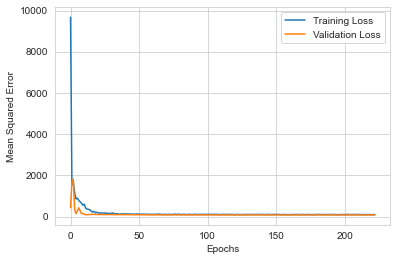

4/4 [==============================] - 0s 667us/step - loss: 56.1545
56.15446853637695
4/4 [==============================] - 0s 667us/step
R-squared: -1.0878296971980252
RMSE: 7.492552108477357


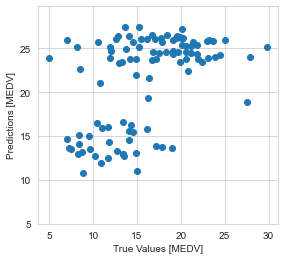

In [258]:
#Adam 优化器和监控训练过程
model5 = Sequential([
    Dense(64, input_dim=13, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.001)),  
    Dropout(0.2),
    Dense(6, activation='relu'),  # 添加新的隐藏层
    Dense(1,activation='linear')
])
model5.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
history5 = model5.fit(X_train_np, Y_train_np, epochs=500, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 步骤4: 绘制训练过程的损失曲线
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# 步骤5: 在测试集上评估模型
test_loss = model5.evaluate(X_test_np, Y_test_np)
print(test_loss)
# 步骤6: 进行预测并可视化
predictions = model5.predict(X_test_np)
# R-squared 值
r2 = r2_score(Y_test_np, predictions)
print(f'R-squared: {r2}')

# 均方根误差 (RMSE)
rmse = np.sqrt(mean_squared_error(Y_test_np, predictions))
print(f'RMSE: {rmse}')

plt.scatter(Y_test_np, predictions)
plt.xlabel('True Values [MEDV]')
plt.ylabel('Predictions [MEDV]')
plt.axis('equal')
plt.axis('square')
plt.ylim(min(Y_test_np), max(Y_test_np)) 
plt.show()
